## Load LC_Data

In [53]:
lc_data = pd.DataFrame.from_csv('./lc_dataframe(cleaning).csv')
lc_data = lc_data.reset_index()
lc_data.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
268131,31050,21.99,1,10,1,875000.0,1,12,1,0,3,9.66,1,0,0,25770,79.3,13,0
268132,10800,7.89,1,8,1,92400.0,1,12,1,0,2,19.62,1,0,0,9760,68.7,36,1
268133,9000,9.17,1,1,1,80000.0,1,12,1,0,3,3.97,1,0,0,6320,51.8,17,0
268134,14400,25.99,0,11,4,62000.0,1,12,1,0,3,16.88,0,1,1,5677,45.1,30,0
268135,8000,12.59,1,4,3,45000.0,1,12,1,0,3,26.21,0,0,0,9097,50.8,47,1


## Added Scaling (loan_amnt, annual_inc, revol_bal) on LC_Data

In [54]:
from sklearn.preprocessing import scale
x_loan_amnt = lc_data['loan_amnt'].reshape(-1,1)

scaled_loan_amnt = pd.DataFrame(np.hstack([scale(x_loan_amnt)]),
                 columns = ["scale(x_loan_amnt)"]
                 )

x_annual_inc = lc_data['annual_inc'].reshape(-1,1)
scaled_annual_inc = pd.DataFrame(np.hstack([scale(x_annual_inc)]),
                 columns = ["scale(x_annual_inc)"]
                 )

x_revol_bal = lc_data['revol_bal'].reshape(-1,1)
scaled_revol_bal = pd.DataFrame(np.hstack([scale(x_revol_bal)]),
                 columns = ["scale(x_revol_bal)"]
                 )

"""print(scaled_loan_amnt['scale(x_loan_amnt)'])
print(scaled_annual_inc['scale(x_annual_inc)'])
print(scaled_revol_bal['scale(x_revol_bal)'])"""

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



"print(scaled_loan_amnt['scale(x_loan_amnt)'])\nprint(scaled_annual_inc['scale(x_annual_inc)'])\nprint(scaled_revol_bal['scale(x_revol_bal)'])"

## New data setting (drop loan_amnt, annual_inc, revol_bal) + (shift loan_status dataset) 

In [55]:
lc_data = lc_data.drop('loan_amnt', 1)
lc_data = pd.concat([lc_data, scaled_loan_amnt], axis = 1)

lc_data = lc_data.drop('annual_inc', 1)
lc_data = pd.concat([lc_data, scaled_annual_inc], axis = 1)

lc_data = lc_data.drop('revol_bal', 1)
lc_data = pd.concat([lc_data, scaled_revol_bal], axis = 1)

y = lc_data['loan_status']
lc_data = lc_data.drop('loan_status', 1)
lc_data = pd.concat([lc_data, y], axis = 1)

lc_data.tail()

,int_rate,emp_title,emp_length,home_ownership,verification_status,issue_d,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,total_acc,initial_list_status,scale(x_loan_amnt),scale(x_annual_inc),scale(x_revol_bal),loan_status
268131,21.99,1,10,1,1,12,0,3,9.66,1,0,0,79.3,13,0,2.127000,13.782613,0.561689,1
268132,7.89,1,8,1,1,12,0,2,19.62,1,0,0,68.7,36,1,-0.352019,0.343283,-0.287872,1
268133,9.17,1,1,1,1,12,0,3,3.97,1,0,0,51.8,17,0,-0.572376,0.130342,-0.470413,1
268134,25.99,0,11,4,1,12,0,3,16.88,0,1,1,45.1,30,0,0.088696,-0.178766,-0.504533,1
268135,12.59,1,4,3,1,12,0,3,26.21,0,0,0,50.8,47,1,-0.694797,-0.470701,-0.323053,1


## Decision Tree data setting

In [56]:
feature_names = ["int_rate",	"emp_title", "emp_length",	"home_ownership",	"verification_status",	"issue_d",	"desc",	"purpose",	"dti",	"delinq_2yrs",	"inq_last_6mths",	"pub_rec",	"revol_util",	"total_acc",	"initial_list_status",	"scale(x_loan_amnt)",	"scale(x_annual_inc)",	"scale(x_revol_bal)"]
dfX = lc_data[feature_names]
dfy = lc_data['loan_status']
dfX.tail()

,int_rate,emp_title,emp_length,home_ownership,verification_status,issue_d,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,total_acc,initial_list_status,scale(x_loan_amnt),scale(x_annual_inc),scale(x_revol_bal)
268131,21.99,1,10,1,1,12,0,3,9.66,1,0,0,79.3,13,0,2.127000,13.782613,0.561689
268132,7.89,1,8,1,1,12,0,2,19.62,1,0,0,68.7,36,1,-0.352019,0.343283,-0.287872
268133,9.17,1,1,1,1,12,0,3,3.97,1,0,0,51.8,17,0,-0.572376,0.130342,-0.470413
268134,25.99,0,11,4,1,12,0,3,16.88,0,1,1,45.1,30,0,0.088696,-0.178766,-0.504533
268135,12.59,1,4,3,1,12,0,3,26.21,0,0,0,50.8,47,1,-0.694797,-0.470701,-0.323053


## Model Setting

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=1)

In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2).fit(X_train, y_train)

In [75]:
from sklearn import tree
with open('lc.dot','w') as f:
    f = tree.export_graphviz(model, out_file=f)
import os
os.unlink('lc.dot')
## 저장소 만들기 시도

In [78]:
import pydotplus
dot_data = tree.export_graphviz(model, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('lc.pdf')
## Pdf 파일로 뽑아내기 시도 

True

## Model Display

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.731325 to fit



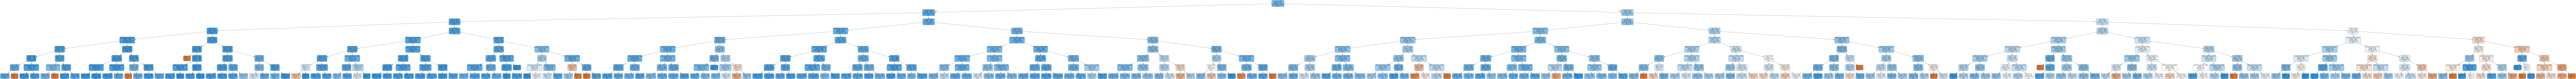

In [90]:
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=f,
                               feature_names=["int_rate",	"emp_title", "emp_length",	"home_ownership",	"verification_status",	"issue_d",	"desc",	"purpose",	"dti",	"delinq_2yrs",	"inq_last_6mths",	"pub_rec",	"revol_util",	"total_acc",	"initial_list_status",	"scale(x_loan_amnt)",	"scale(x_annual_inc)",	"scale(x_revol_bal)"],
                               class_names = 'loan_status', 
                               filled=True, rounded = True, 
                               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_jpeg())

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, model.predict(X_train))

array([[  3450,  41886],
       [  2449, 153317]])

In [94]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 1033, 14046],
       [  982, 50973]])

## 성능 비교하기 

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.58      0.08      0.13     45336
          1       0.79      0.98      0.87    155766

avg / total       0.74      0.78      0.71    201102



In [96]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.51      0.07      0.12     15079
          1       0.78      0.98      0.87     51955

avg / total       0.72      0.78      0.70     67034

